In [149]:
import numpy as np
a = np.array([1,2,3])

print(a)


[1 2 3]


In [20]:
numpy_array_2d = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])

numpy_array_2d[:,-3:]

array([[ 4,  5,  6],
       [10, 11, 12]])

In [79]:
import numpy as np #importing numpy
from numpy.random import randn,randint #importing randn
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    DO NOT EDIT (from: https://github.com/foxtrotmike/plotit)
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)        
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:            
            conts = sorted([-1+eps,0,1-eps])
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

def getExamples(n=100,d=2):
    """
    DO NOT EDIT
    Generates n d-dimensional normally distributed examples of each class        
    The mean of the positive class is [1] and for the negative class it is [-1]
    """
    Xp = randn(n,d)#+1   #generate n examples of the positie class
    Xp=Xp+1
    Xn = randn(n,d)#-1   #generate n examples of the negative class
    Xn=Xn-1
    X = np.vstack((Xp,Xn))  #Stack the examples together to a single matrix
    Y = np.array([+1]*n+[-1]*n) #Associate Labels
    return (X,Y) 


X,Y = getExamples()

print('X')
print(X)

print('Y')
print(Y)


X
[[ 2.75504924 -0.35957277]
 [ 2.87522757  1.28733303]
 [ 1.29540967 -1.15154816]
 [ 0.77507679  0.82473591]
 [ 0.21996645 -0.37474116]
 [ 1.49934091  1.43532477]
 [ 1.03045091  1.51402758]
 [ 0.85643349  1.03961371]
 [ 0.96873878  1.4377592 ]
 [-0.03877679  2.81980481]
 [ 1.56641861  0.62456786]
 [ 0.70765719  0.19988479]
 [ 0.30590661  0.74133226]
 [ 0.16759142  0.95749822]
 [ 3.78047684  2.03519451]
 [ 1.74194925  0.97651386]
 [ 0.37850821  1.4223648 ]
 [ 1.67993377  2.46175826]
 [ 0.48067473  2.50441103]
 [-0.13608558 -0.89610359]
 [ 2.46893165  2.5887553 ]
 [ 0.59139636 -0.5092212 ]
 [ 0.85917345  0.81415984]
 [ 3.71099686  0.74736113]
 [ 3.30752543  1.4250457 ]
 [ 1.04621601  0.3505164 ]
 [ 1.65448935  0.30049618]
 [ 2.21440889  0.47742191]
 [ 0.734512    1.31483792]
 [ 0.76795922 -0.73579774]
 [ 1.56611681 -0.24164456]
 [ 2.29420969  2.72754582]
 [ 1.64458892  0.80025029]
 [-0.66544688  2.03532623]
 [ 1.8980581  -0.07012879]
 [ 1.61492122  0.91432345]
 [ 0.40449119 -0.26886697]

In [258]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import itertools


X_train = np.array(pd.read_csv("../data/Xtrain.csv", sep=' ', header=None))
Y_train = np.array(pd.read_csv("../data/Ytrain.csv", sep=' ', header=None))
X_test = np.array(pd.read_csv("../data/Xtest.csv", sep=' ', header=None))

print(len(X_train))
print(len(Y_train))
print(len(X_test))

np.random.shuffle(X_train)
ten_random_rows = X_train[:10,:]



3000
3000
3000
Random Row: 

[[53  9  0 ...  0  0  0]
 [63  0  0 ...  0  0  0]
 [31  0 47 ...  9  0  0]
 ...
 [13  0 17 ...  0  0  0]
 [39 45  0 ... 31  0  0]
 [12  0  0 ...  0 12  2]]


In [ ]:


# arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# print(arr.shape)
# arr1 = arr.reshape(4, 2)
# print(arr)
# print(arr1)

# temp_arr = np.array(['1 2 3 4 5 6 7 8'])
# print(temp_arr.shape)
# temp_arr1 = temp_arr.reshape(4,2)
# print(temp_arr)

# random_row=X_train.iloc[7].to_string()

# print(random_row)

# reshaped_arr= random_row.reshape(4,2)
# print(random_row)

# X_train = nm.array(list(csv.reader(open("../data/Xtrain.csv", "rb"), delimiter=","))).astype("float")
# Y_train = nm.array(list(csv.reader(open("../data/Ytrain.csv", "rb"), delimiter=","))).astype("float")

# print(X_train)

# print(X_train.size)
# print(Y_train.size)




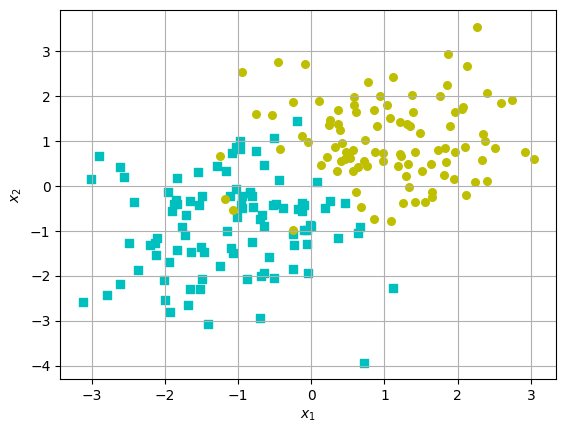

[-3.1233707998495475,
 3.0383139682154883,
 -3.9311887851274894,
 3.5434843003345806]

In [2]:
import numpy as np #importing numpy
from numpy.random import randn,randint #importing randn
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    DO NOT EDIT (from: https://github.com/foxtrotmike/plotit)
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)        
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:            
            conts = sorted([-1+eps,0,1-eps])
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

def getExamples(n=100,d=2):
    """
    DO NOT EDIT
    Generates n d-dimensional normally distributed examples of each class        
    The mean of the positive class is [1] and for the negative class it is [-1]
    """
    Xp = randn(n,d)#+1   #generate n examples of the positie class
    Xp=Xp+1
    Xn = randn(n,d)#-1   #generate n examples of the negative class
    Xn=Xn-1
    X = np.vstack((Xp,Xn))  #Stack the examples together to a single matrix
    Y = np.array([+1]*n+[-1]*n) #Associate Labels
    return (X,Y) 


X,Y = getExamples()
plotit(X = X, Y = Y)

In [14]:
def distance(p,q):
    """
    Input:
        p: (1xd) numpy vector of 1 training examples each with d features
        q: (1xd) numpy vector of 1 training examples each with d features        
    Return:
        d: Euclidean Distance
    TO IMPLEMENT:
        Euclidean distance formula.    
    """
    # Put your code here
    d = np.linalg.norm(p-q)
    
    return d

In [16]:
print(distance(np.array([0,0]),np.array([1,1])))
print(distance(np.array([1,1]),np.array([0,0])))
print(distance(np.array([-1,-5]),np.array([1,0])))

point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))
 
print(distance(point1,point2))

1.4142135623730951
1.4142135623730951
5.385164807134504
2.23606797749979


In [24]:
Xtest,Ytest = getExamples(n=100,d=2)
print(Xtest)
print(Ytest)

[[ 2.00109816e+00  9.56999476e-01]
 [ 1.31161781e+00  1.44083972e+00]
 [ 2.22804174e+00  2.85712393e+00]
 [ 1.02596763e+00  9.71293049e-01]
 [ 1.16057956e+00  6.09001270e-01]
 [-3.43657757e-01  2.28797568e+00]
 [ 4.24675107e-01  1.88797511e-01]
 [ 8.08402655e-01  1.89563697e+00]
 [ 1.31996165e+00  6.50809232e-01]
 [ 1.91594370e+00 -2.03521993e-01]
 [ 8.03247987e-01  1.32977013e+00]
 [ 1.95595894e+00  1.09399109e+00]
 [ 1.23900032e+00  7.45466128e-01]
 [ 2.28307318e-01  5.71901665e-02]
 [-7.29327701e-01  1.99371150e+00]
 [ 2.34823787e+00  3.18715911e+00]
 [ 2.84983154e-01  1.63601354e+00]
 [ 7.37885746e-01  9.93708557e-01]
 [ 2.86910261e-01  2.11316523e+00]
 [-7.21673917e-02  3.50952734e+00]
 [ 2.32000436e+00  2.22326613e+00]
 [ 7.32222856e-01  1.48579665e+00]
 [ 6.46358320e-01  1.88435567e+00]
 [ 2.09615483e+00  1.50172833e+00]
 [ 2.00395962e+00  5.44378876e-02]
 [ 7.50681230e-01  1.43408784e-01]
 [ 5.25032016e-01  1.68343382e+00]
 [-1.06474598e+00  4.11255314e-02]
 [ 4.22346858e-01  1

In [69]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X, Y)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)

acc = accuracy_score(Ytest,y_pred)

print(acc)

0.91


/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_12775/798015659.py:59: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


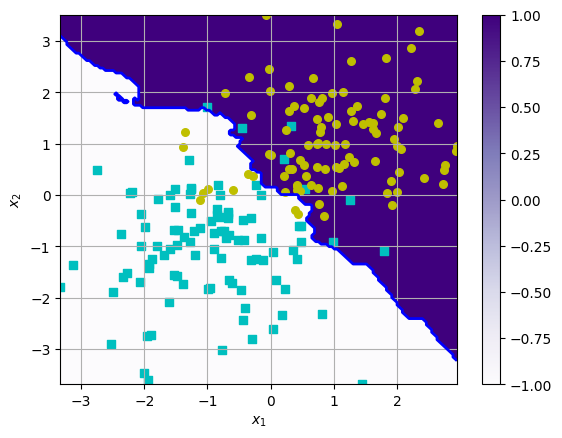

accuracy :0.91


In [81]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X,Y)

plotit(X=Xtest,Y=Ytest,clf=clf.predict,conts=[0]) # do not edit

pred = clf.predict(Xtest)
acc = np.mean(pred==Ytest)

print("accuracy :" + str(acc))

In [171]:


def AccuracyOfRandomClassifier(Xtr,Ytr,Xtt,Ytt):

    print(Xtt.shape[0])
    Ypred = 2*randint(0,2,Xtt.shape[0])-1 
    accuracy = np.mean(Ypred==Ytt)
    return accuracy

print("Accuracy of a Random Classifier: " + str(z))


for ex in range(100):
    cumulative_acc += AccuracyOfRandomClassifier(X,Y,Xtest,Ytest)

avg_accuracy = cumulative_acc/100.0
print(avg_accuracy)

SyntaxError: invalid syntax (3423736101.py, line 9)